In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
music_df = pd.read_csv('../data/raw/recommendation_training_data.csv')

In [3]:
music_df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

In [4]:
# make copy of music_df
music_df_log_t = music_df.copy()

# listing all columns that are float64 type EXCEPT for age
cols_for_transforming = ['dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings']

# for all columns with data float64 except for age, perform log transformation
for c in cols_for_transforming:
    music_df_log_t[c] = np.log(music_df[c])

In [5]:
# confirming log transformation

music_df_log_t

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,-7.421776,-2.752847,-7.421776,...,-1.332750,-7.421776,-3.236827,-7.421776,-7.421776,-7.421776,-0.966798,-2.144083,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,-3.337177,-2.335349,-0.813204,...,-6.658011,-6.658011,-2.136784,-6.658011,-1.547962,-2.973497,-6.658011,-6.658011,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,-5.888878,-5.888878,-5.888878,...,-1.383626,-5.888878,-1.127648,-5.888878,-5.888878,-5.888878,-5.888878,-1.489780,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,-3.031378,-6.470799,-6.470799,...,-6.470799,-6.470799,-6.470799,-2.046008,-6.470799,-6.470799,-1.487709,-6.470799,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,-6.608000,-6.608000,-0.872819,...,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-3.514773,-2.676549,-6.608000,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,-6.608000,-6.608000,-6.608000,...,-6.608000,-0.937384,-6.608000,-0.832205,-6.608000,-6.608000,-2.723199,-6.608000,obscene,0.014286
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,-6.658011,-6.658011,-3.342794,...,-1.590182,-1.142846,-2.844694,-2.002813,-6.658011,-6.658011,-6.658011,-6.658011,obscene,0.014286
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,-6.499787,-1.868841,-1.777929,...,-6.499787,-1.030903,-6.499787,-2.678237,-6.499787,-6.499787,-6.499787,-6.499787,obscene,0.014286
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,-6.728629,-6.728629,-6.728629,...,-6.728629,-0.708395,-2.267082,-6.728629,-1.596230,-6.728629,-6.728629,-6.728628,obscene,0.014286


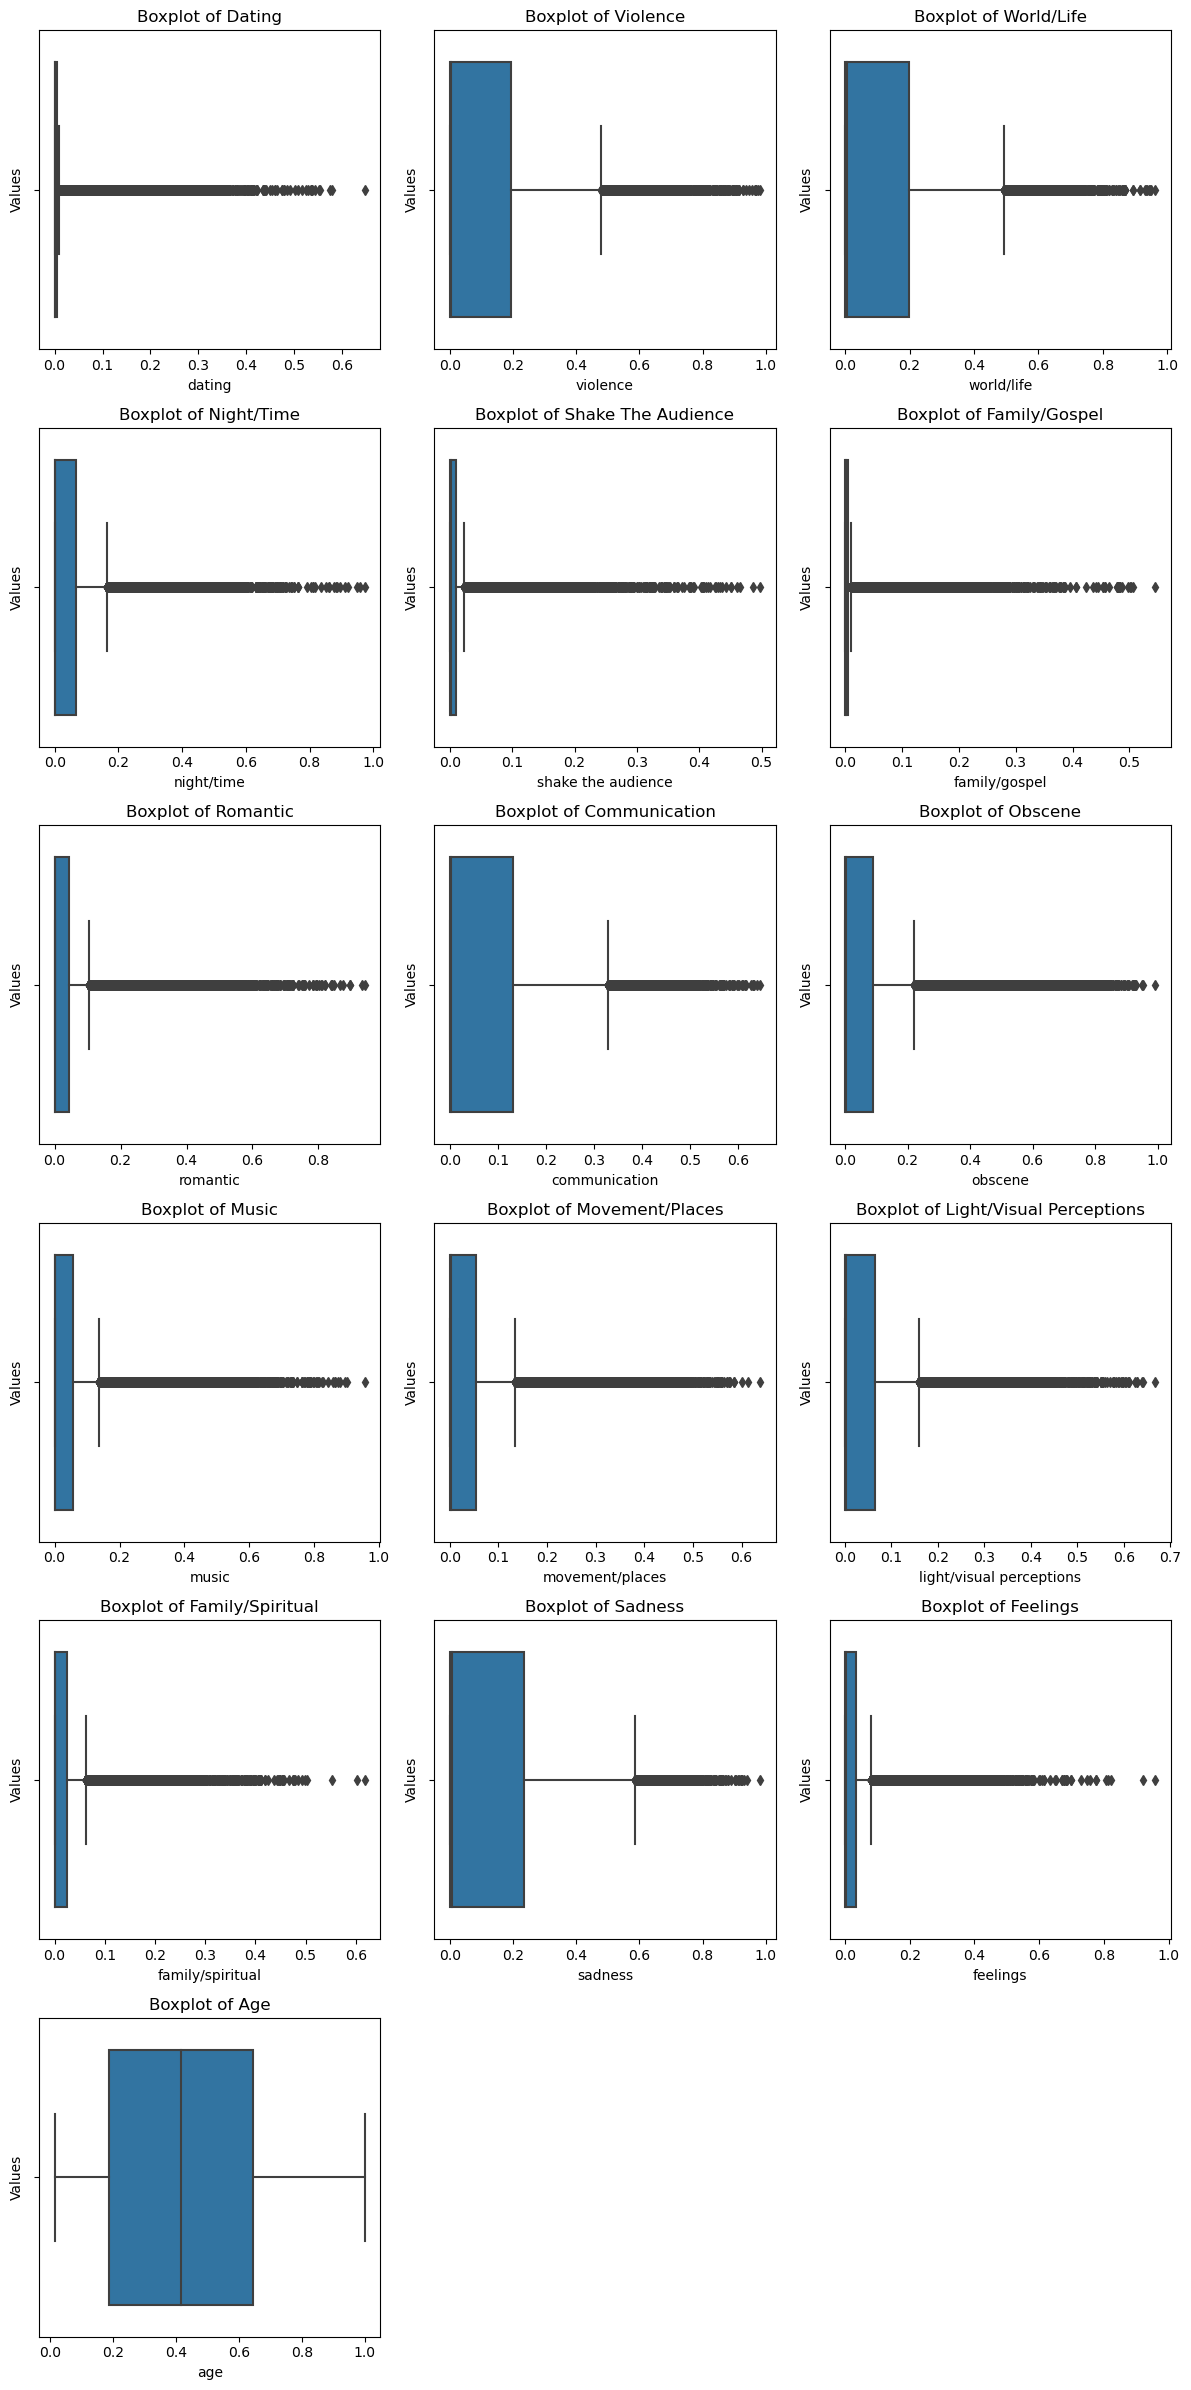

In [6]:
float64_cols = music_df.select_dtypes(include=['float64']).columns

# Set up the figure and subplots
num_cols = len(float64_cols)
num_rows = int(np.ceil(num_cols / 3))
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))
axes = axes.flatten()

# Create boxplots for each column
for i, col in enumerate(float64_cols):
    sns.boxplot(x=col, data=music_df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col.title()}')
    axes[i].set_ylabel('Values')

# Remove empty subplots
for ax in axes[num_cols:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

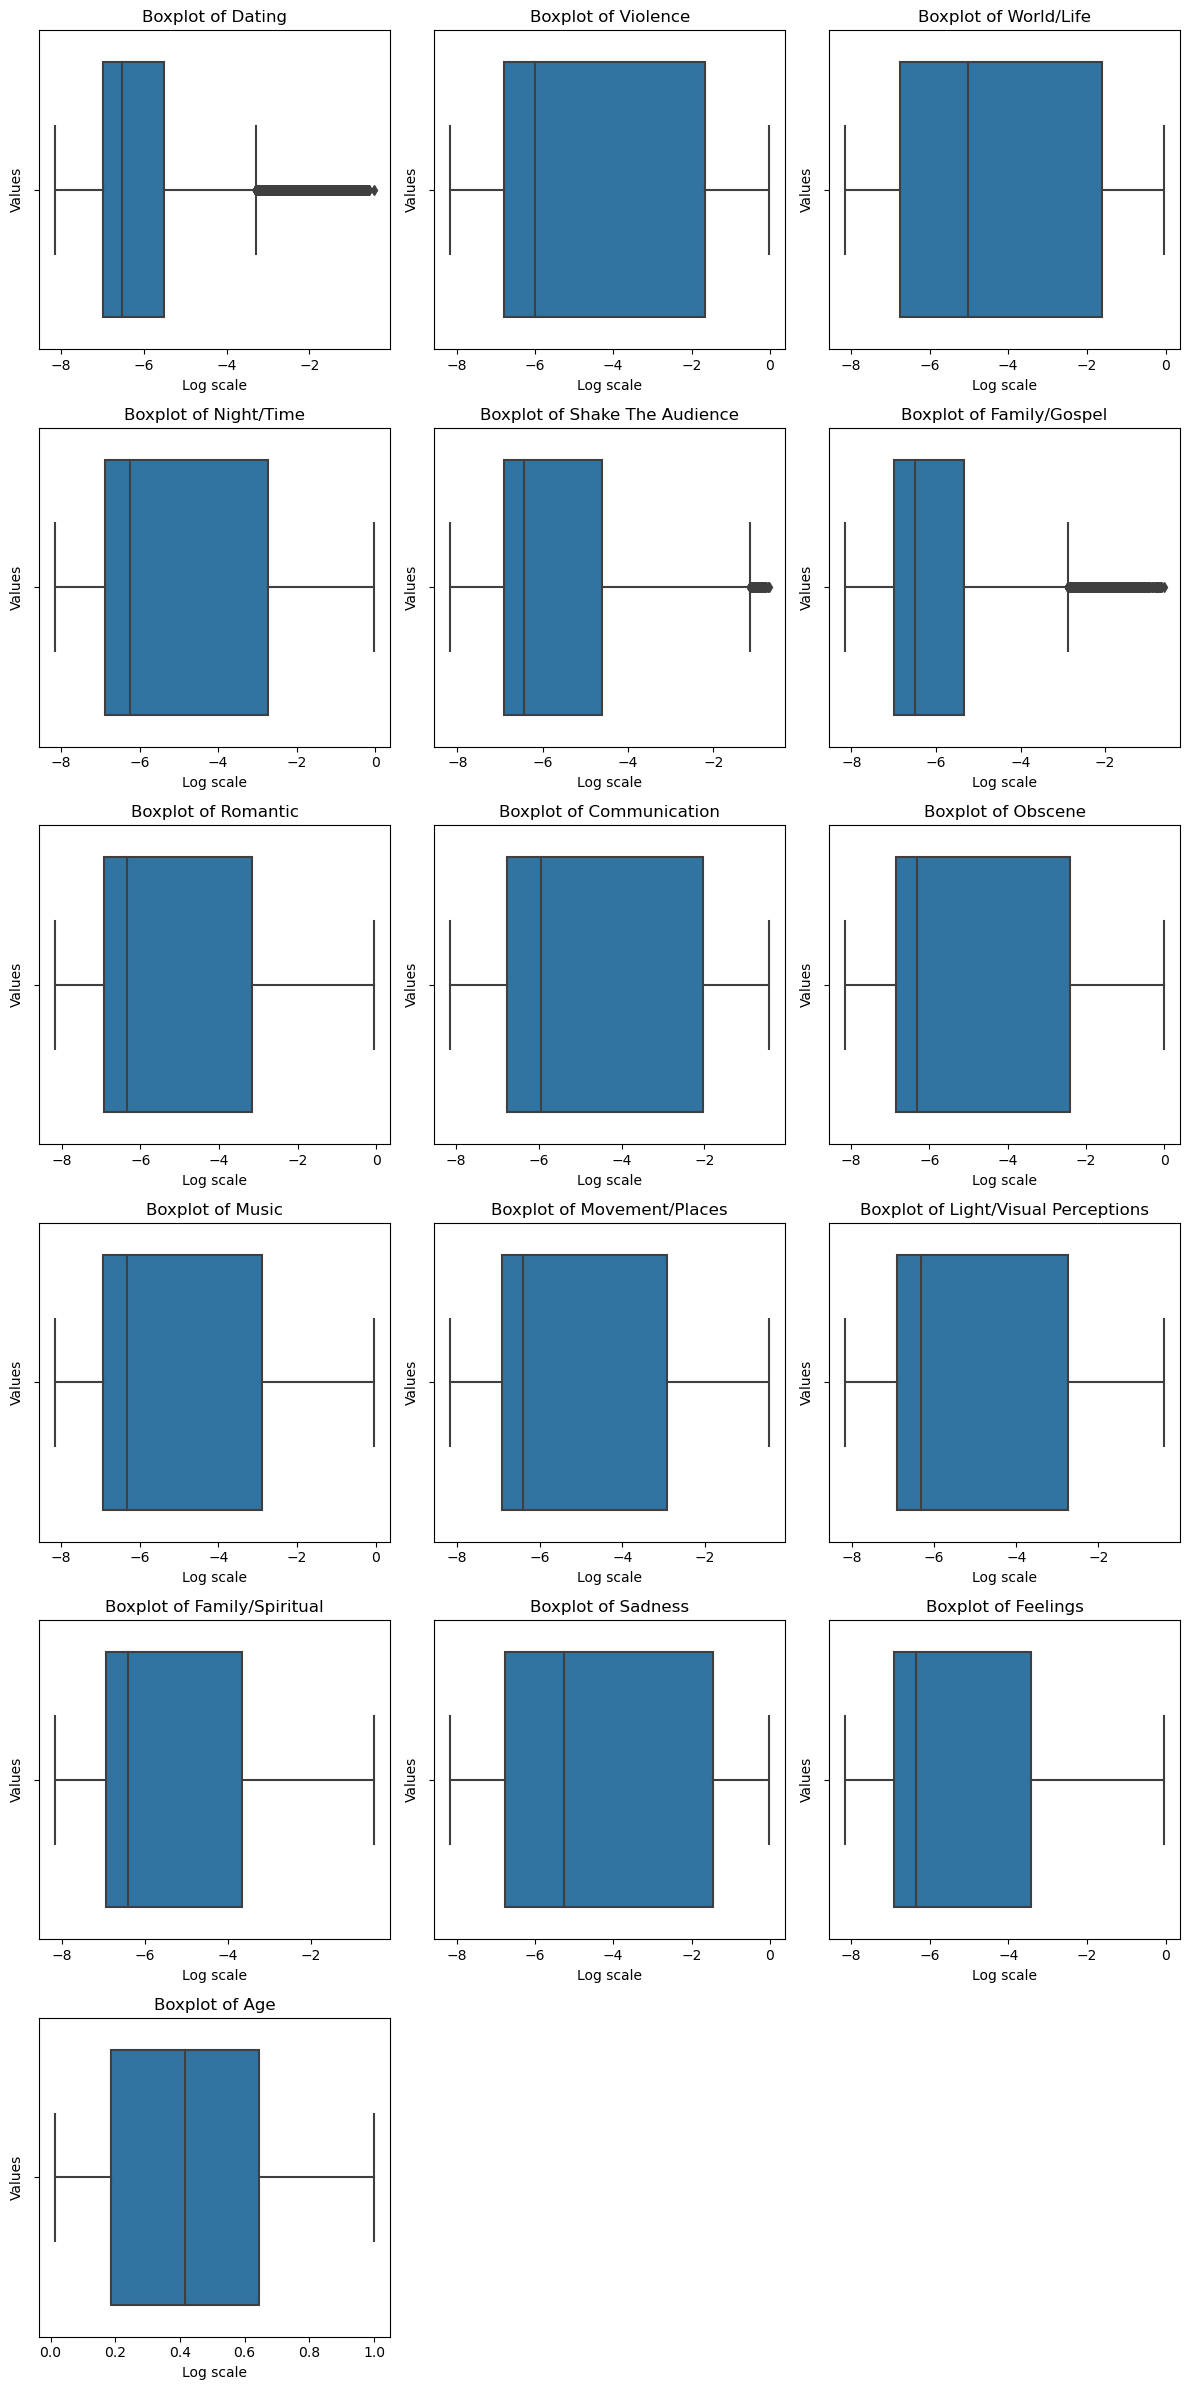

In [7]:
float64_cols = music_df.select_dtypes(include=['float64']).columns

# Set up the figure and subplots
num_cols = len(float64_cols)
num_rows = int(np.ceil(num_cols / 3))
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))
axes = axes.flatten()

# Create boxplots for each column
for i, col in enumerate(float64_cols):
    sns.boxplot(x=col, data=music_df_log_t, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col.title()}')
    axes[i].set_xlabel('Log scale')
    axes[i].set_ylabel('Values')

# Remove empty subplots
for ax in axes[num_cols:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

We can see outliers in the dating, shake the audienece, and family/gospel columns

# Handling Outliers

In [8]:
# IQR method for Dating theme
dating_Q1 = music_df_log_t['dating'].quantile(0.25)
dating_Q3 = music_df_log_t['dating'].quantile(0.75)
dating_IQR = dating_Q3 - dating_Q1

dating_upper_limit = dating_Q3 + 1.5 * dating_IQR
dating_lower_limit = dating_Q1 - 1.5 * dating_IQR
dating_outliers_iqr = music_df_log_t[(music_df_log_t['dating'] < dating_lower_limit) | (music_df_log_t['dating'] > dating_upper_limit)]

dating_outliers_iqr.shape[0]

4592

In [9]:
# checking to see if outliers are indeed only above the upper limit

music_df_log_t[(music_df_log_t['dating'] > dating_upper_limit)].shape[0]

4592

In [10]:
# IQR method for Shake the Audience theme
shake_Q1 = music_df_log_t['shake the audience'].quantile(0.25)
shake_Q3 = music_df_log_t['shake the audience'].quantile(0.75)
shake_IQR = shake_Q3 - shake_Q1

shake_upper_limit = shake_Q3 + 1.5 * shake_IQR
shake_lower_limit = shake_Q1 - 1.5 * shake_IQR
shake_outliers_iqr = music_df_log_t[(music_df_log_t['shake the audience'] < shake_lower_limit) | (music_df_log_t['shake the audience'] > shake_upper_limit)]

shake_outliers_iqr.shape[0]

62

In [11]:
# checking to see if outliers are indeed only above the upper limit

music_df_log_t[(music_df_log_t['shake the audience'] > shake_upper_limit)].shape[0]

62

In [12]:
# IQR method for Family/Gospel theme
fg_Q1 = music_df_log_t['family/gospel'].quantile(0.25)
fg_Q3 = music_df_log_t['family/gospel'].quantile(0.75)
fg_IQR = fg_Q3 - fg_Q1

fg_upper_limit = fg_Q3 + 1.5 * fg_IQR
fg_lower_limit = fg_Q1 - 1.5 * fg_IQR
fg_outliers_iqr = music_df_log_t[(music_df_log_t['family/gospel'] < fg_lower_limit) | (music_df_log_t['family/gospel'] > fg_upper_limit)]


fg_outliers_iqr.shape[0]

2747

In [13]:
# checking to see if outliers are indeed only above the upper limit

music_df_log_t[(music_df_log_t['family/gospel'] > fg_upper_limit)].shape[0]

2747

## Trimming

In [14]:
trim1 = music_df_log_t[music_df_log_t['dating'] < dating_upper_limit]
trim1.shape[0]

23770

In [15]:
trim2 = trim1[trim1['shake the audience'] < shake_upper_limit]
trim2.shape[0]

23721

In [16]:
music_df_log_t_dropped_outliers = trim2[trim2['family/gospel'] < fg_upper_limit]
music_df_log_t_dropped_outliers.shape[0]

21480

In [17]:
# checking to see how many rows we dropped in total and the percentage of the original total

original_number_of_rows = 28362
after_outliers_rows_dropped = 21480

print('Number of rows dropped:', original_number_of_rows - after_outliers_rows_dropped)
print('Percentage of rows dropped', (original_number_of_rows - after_outliers_rows_dropped)/original_number_of_rows * 100)

Number of rows dropped: 6882
Percentage of rows dropped 24.264861434313516


This is far too many rows dropped. I'll try another option.

## Winsorization

In [18]:
from scipy.stats.mstats import winsorize

w_columns = ['dating', 'shake the audience', 'family/gospel'] 

winsorized_df = music_df_log_t.copy()

for col in w_columns:
    col_series = winsorized_df[col]
    winsorized_df[col + '_winsorized'] = winsorize(col_series.to_numpy(), limits=(0.05, 0.95))

In [19]:
winsorized_df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,dating_winsorized,shake the audience_winsorized,family/gospel_winsorized
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,-7.421776,-2.752847,-7.421776,...,-7.421776,-7.421776,-7.421776,-0.966798,-2.144083,sadness,1.000000,-7.519149,-7.466228,-7.529406
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,-3.337177,-2.335349,-0.813204,...,-6.658011,-1.547962,-2.973497,-6.658011,-6.658011,world/life,1.000000,-7.519149,-7.466228,-7.529406
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,-5.888878,-5.888878,-5.888878,...,-5.888878,-5.888878,-5.888878,-5.888878,-1.489780,music,1.000000,-7.519149,-7.466228,-7.529406
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,-3.031378,-6.470799,-6.470799,...,-2.046008,-6.470799,-6.470799,-1.487709,-6.470799,romantic,1.000000,-7.519149,-7.466228,-7.529406
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,-6.608000,-6.608000,-0.872819,...,-6.608000,-6.608000,-3.514773,-2.676549,-6.608000,romantic,1.000000,-7.519149,-7.466228,-7.529406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,-6.608000,-6.608000,-6.608000,...,-0.832205,-6.608000,-6.608000,-2.723199,-6.608000,obscene,0.014286,-7.519149,-7.466228,-7.529406
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,-6.658011,-6.658011,-3.342794,...,-2.002813,-6.658011,-6.658011,-6.658011,-6.658011,obscene,0.014286,-7.519149,-7.466228,-7.529406
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,-6.499787,-1.868841,-1.777929,...,-2.678237,-6.499787,-6.499787,-6.499787,-6.499787,obscene,0.014286,-7.519149,-7.466228,-7.529406
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,-6.728629,-6.728629,-6.728629,...,-6.728629,-1.596230,-6.728629,-6.728629,-6.728628,obscene,0.014286,-7.519149,-7.466228,-7.529406


It appears that winsorization has turned all values of the columns into the same value. It is my first time attempting this technique, so perhaps there is a flaw in my process. However, I did not expect to get this output. Due to time contraints, I'll be moving along in the process.

I've decided to include the outliers. For one simply due to time contraints, but in addition, log transforming the columns has significantly decreased the number of outliers, in accordance with the IQR method, compared to the orginial dataset.

# Interesting Discovery

<Axes: xlabel='dating', ylabel='romantic'>

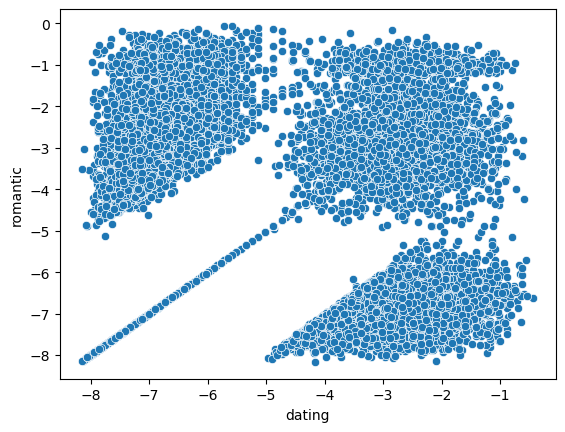

In [20]:
sns.scatterplot(data=music_df_log_t, x='dating', y='romantic')

In [21]:
x = music_df_log_t[music_df_log_t['dating'] < -5]


In [22]:
y = music_df_log_t[music_df_log_t['romantic'] < -5]


<Axes: xlabel='dating', ylabel='romantic'>

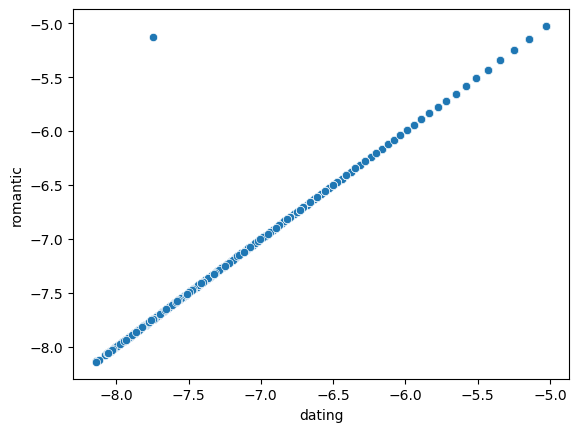

In [23]:
sns.scatterplot(x=x['dating'], y=y['romantic'])

<Axes: xlabel='dating', ylabel='obscene'>

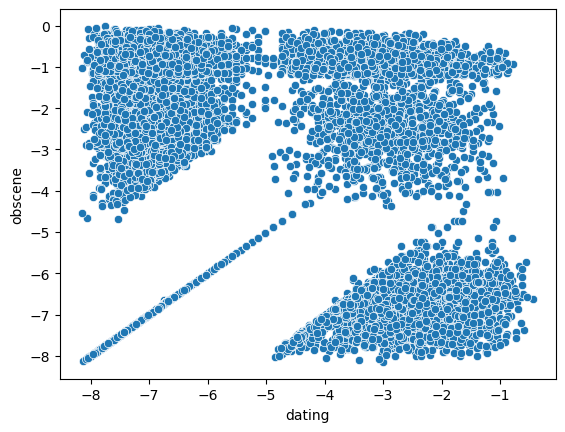

In [24]:
sns.scatterplot(data=music_df_log_t, x='dating', y='obscene')

I found an interesting insight. When looking at the scatterplot of the 'dating and 'romantic' columns in music_df_log_t, we find a near perfect correlation of values in the low scoring group. Out of curiousity, I plotted 'dating' vs, 'romantic' and it appears that this pattern exists within this scatterplot as well. I'll investigate further at another time

# Drop Columns

In [25]:
columns_to_drop = ['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'lyrics']

In [26]:
music_df_log_t_drop = music_df_log_t.drop(columns_to_drop, axis=1)

In [27]:
music_df_log_t_drop

,genre,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,pop,95,-7.421776,-2.752847,-7.421776,-7.421776,-7.421776,-3.018857,-4.068423,-1.332750,-7.421776,-3.236827,-7.421776,-7.421776,-7.421776,-0.966798,-2.144083,sadness,1.000000
1,pop,51,-3.337177,-2.335349,-0.813204,-6.658011,-6.658011,-3.611642,-6.658011,-6.658011,-6.658011,-2.136784,-6.658011,-1.547962,-2.973497,-6.658011,-6.658011,world/life,1.000000
2,pop,24,-5.888878,-5.888878,-5.888878,-5.888878,-5.888878,-5.888878,-1.841594,-1.383626,-5.888878,-1.127648,-5.888878,-5.888878,-5.888878,-5.888878,-1.489780,music,1.000000
3,pop,54,-3.031378,-6.470799,-6.470799,-6.470799,-3.839686,-6.470799,-0.887859,-6.470799,-6.470799,-6.470799,-2.046008,-6.470799,-6.470799,-1.487709,-6.470799,romantic,1.000000
4,pop,48,-6.608000,-6.608000,-0.872819,-6.608000,-6.608000,-6.608000,-0.769100,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-3.514773,-2.676549,-6.608000,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,78,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-0.937384,-6.608000,-0.832205,-6.608000,-6.608000,-2.723199,-6.608000,obscene,0.014286
28358,hip hop,67,-6.658011,-6.658011,-3.342794,-6.658011,-6.658011,-6.658011,-2.713206,-1.590182,-1.142846,-2.844694,-2.002813,-6.658011,-6.658011,-6.658011,-6.658011,obscene,0.014286
28359,hip hop,77,-6.499787,-1.868841,-1.777929,-6.499787,-3.225008,-6.499787,-3.341008,-6.499787,-1.030903,-6.499787,-2.678237,-6.499787,-6.499787,-6.499787,-6.499787,obscene,0.014286
28360,hip hop,67,-6.728629,-6.728629,-6.728629,-6.728629,-3.029107,-6.728629,-6.728629,-6.728629,-0.708395,-2.267082,-6.728629,-1.596230,-6.728629,-6.728629,-6.728628,obscene,0.014286


# Scaling

In [28]:
columns_to_scale = music_df_log_t_drop.select_dtypes(include=['int', 'float']).columns.tolist()
standard_scaler = StandardScaler()

df_scaled = music_df_log_t_drop.copy()  
df_scaled[columns_to_scale] = standard_scaler.fit_transform(music_df_log_t_drop[columns_to_scale])


In [29]:
# taking a look at the scaled dataframe
df_scaled

,genre,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,pop,0.525197,-0.913672,0.655609,-1.219950,-1.048755,-0.990800,1.679368,0.548641,1.346268,-0.971263,0.843742,-0.954284,-1.021979,-0.996862,1.237622,1.673739,sadness,2.176685
1,pop,-0.526657,1.401776,0.815335,1.326818,-0.710221,-0.536293,1.326662,-0.645544,-0.850660,-0.662785,1.328395,-0.604521,1.626987,1.376968,-0.914008,-0.634402,world/life,2.176685
2,pop,-1.172114,-0.044714,-0.544165,-0.629212,-0.369307,-0.078592,-0.028291,1.575540,1.325279,-0.352138,1.772996,-0.252301,-0.330675,-0.178829,-0.623228,2.008309,music,2.176685
3,pop,-0.454940,1.575126,-0.766795,-0.853469,-0.627240,1.140855,-0.374533,2.015353,-0.773426,-0.587171,-0.581069,1.507522,-0.593109,-0.489372,1.040685,-0.538673,romantic,2.176685
4,pop,-0.598375,-0.452364,-0.819285,1.303844,-0.688054,-0.506533,-0.456168,2.070119,-0.830028,-0.642586,-0.641516,-0.581619,-0.654984,1.088116,0.591230,-0.608829,romantic,2.176685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,0.118799,-0.452364,-0.819285,-0.906343,-0.688054,-0.506533,-0.456168,-0.622481,-0.830028,1.647733,-0.641516,2.063377,-0.654984,-0.562589,0.573594,-0.608829,obscene,-1.555734
28358,hip hop,-0.144165,-0.480714,-0.838418,0.351981,-0.710221,-0.536293,-0.485924,1.173597,1.240065,1.564748,1.016507,1.527303,-0.677537,-0.589278,-0.914008,-0.634402,obscene,-1.555734
28359,hip hop,0.094893,-0.391021,0.993810,0.955039,-0.640089,1.506642,-0.391781,0.884087,-0.785385,1.609961,-0.593840,1.217996,-0.606182,-0.504841,-0.854189,-0.553496,obscene,-1.555734
28360,hip hop,-0.144165,-0.520745,-0.865435,-0.952830,-0.741522,1.623220,-0.527941,-0.678109,-0.879793,1.740220,1.270989,-0.636860,1.605219,-0.626963,-0.940706,-0.670511,obscene,-1.555734


## Dummy Variables

I'm curious to see if I can drop the topic column. After I one hot encode, I'll build a correlation matrix to check if there are any potentially strong relationshsips.

In [30]:
columns_to_encode = ['genre', 'topic']
df_encoded = pd.get_dummies(df_scaled, columns=columns_to_encode, drop_first=True, dtype='int')


In [31]:
df_encoded

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,...,genre_pop,genre_reggae,genre_rock,topic_music,topic_night/time,topic_obscene,topic_romantic,topic_sadness,topic_violence,topic_world/life
0,0.525197,-0.913672,0.655609,-1.219950,-1.048755,-0.990800,1.679368,0.548641,1.346268,-0.971263,...,1,0,0,0,0,0,0,1,0,0
1,-0.526657,1.401776,0.815335,1.326818,-0.710221,-0.536293,1.326662,-0.645544,-0.850660,-0.662785,...,1,0,0,0,0,0,0,0,0,1
2,-1.172114,-0.044714,-0.544165,-0.629212,-0.369307,-0.078592,-0.028291,1.575540,1.325279,-0.352138,...,1,0,0,1,0,0,0,0,0,0
3,-0.454940,1.575126,-0.766795,-0.853469,-0.627240,1.140855,-0.374533,2.015353,-0.773426,-0.587171,...,1,0,0,0,0,0,1,0,0,0
4,-0.598375,-0.452364,-0.819285,1.303844,-0.688054,-0.506533,-0.456168,2.070119,-0.830028,-0.642586,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,0.118799,-0.452364,-0.819285,-0.906343,-0.688054,-0.506533,-0.456168,-0.622481,-0.830028,1.647733,...,0,0,0,0,0,1,0,0,0,0
28358,-0.144165,-0.480714,-0.838418,0.351981,-0.710221,-0.536293,-0.485924,1.173597,1.240065,1.564748,...,0,0,0,0,0,1,0,0,0,0
28359,0.094893,-0.391021,0.993810,0.955039,-0.640089,1.506642,-0.391781,0.884087,-0.785385,1.609961,...,0,0,0,0,0,1,0,0,0,0
28360,-0.144165,-0.520745,-0.865435,-0.952830,-0.741522,1.623220,-0.527941,-0.678109,-0.879793,1.740220,...,0,0,0,0,0,1,0,0,0,0


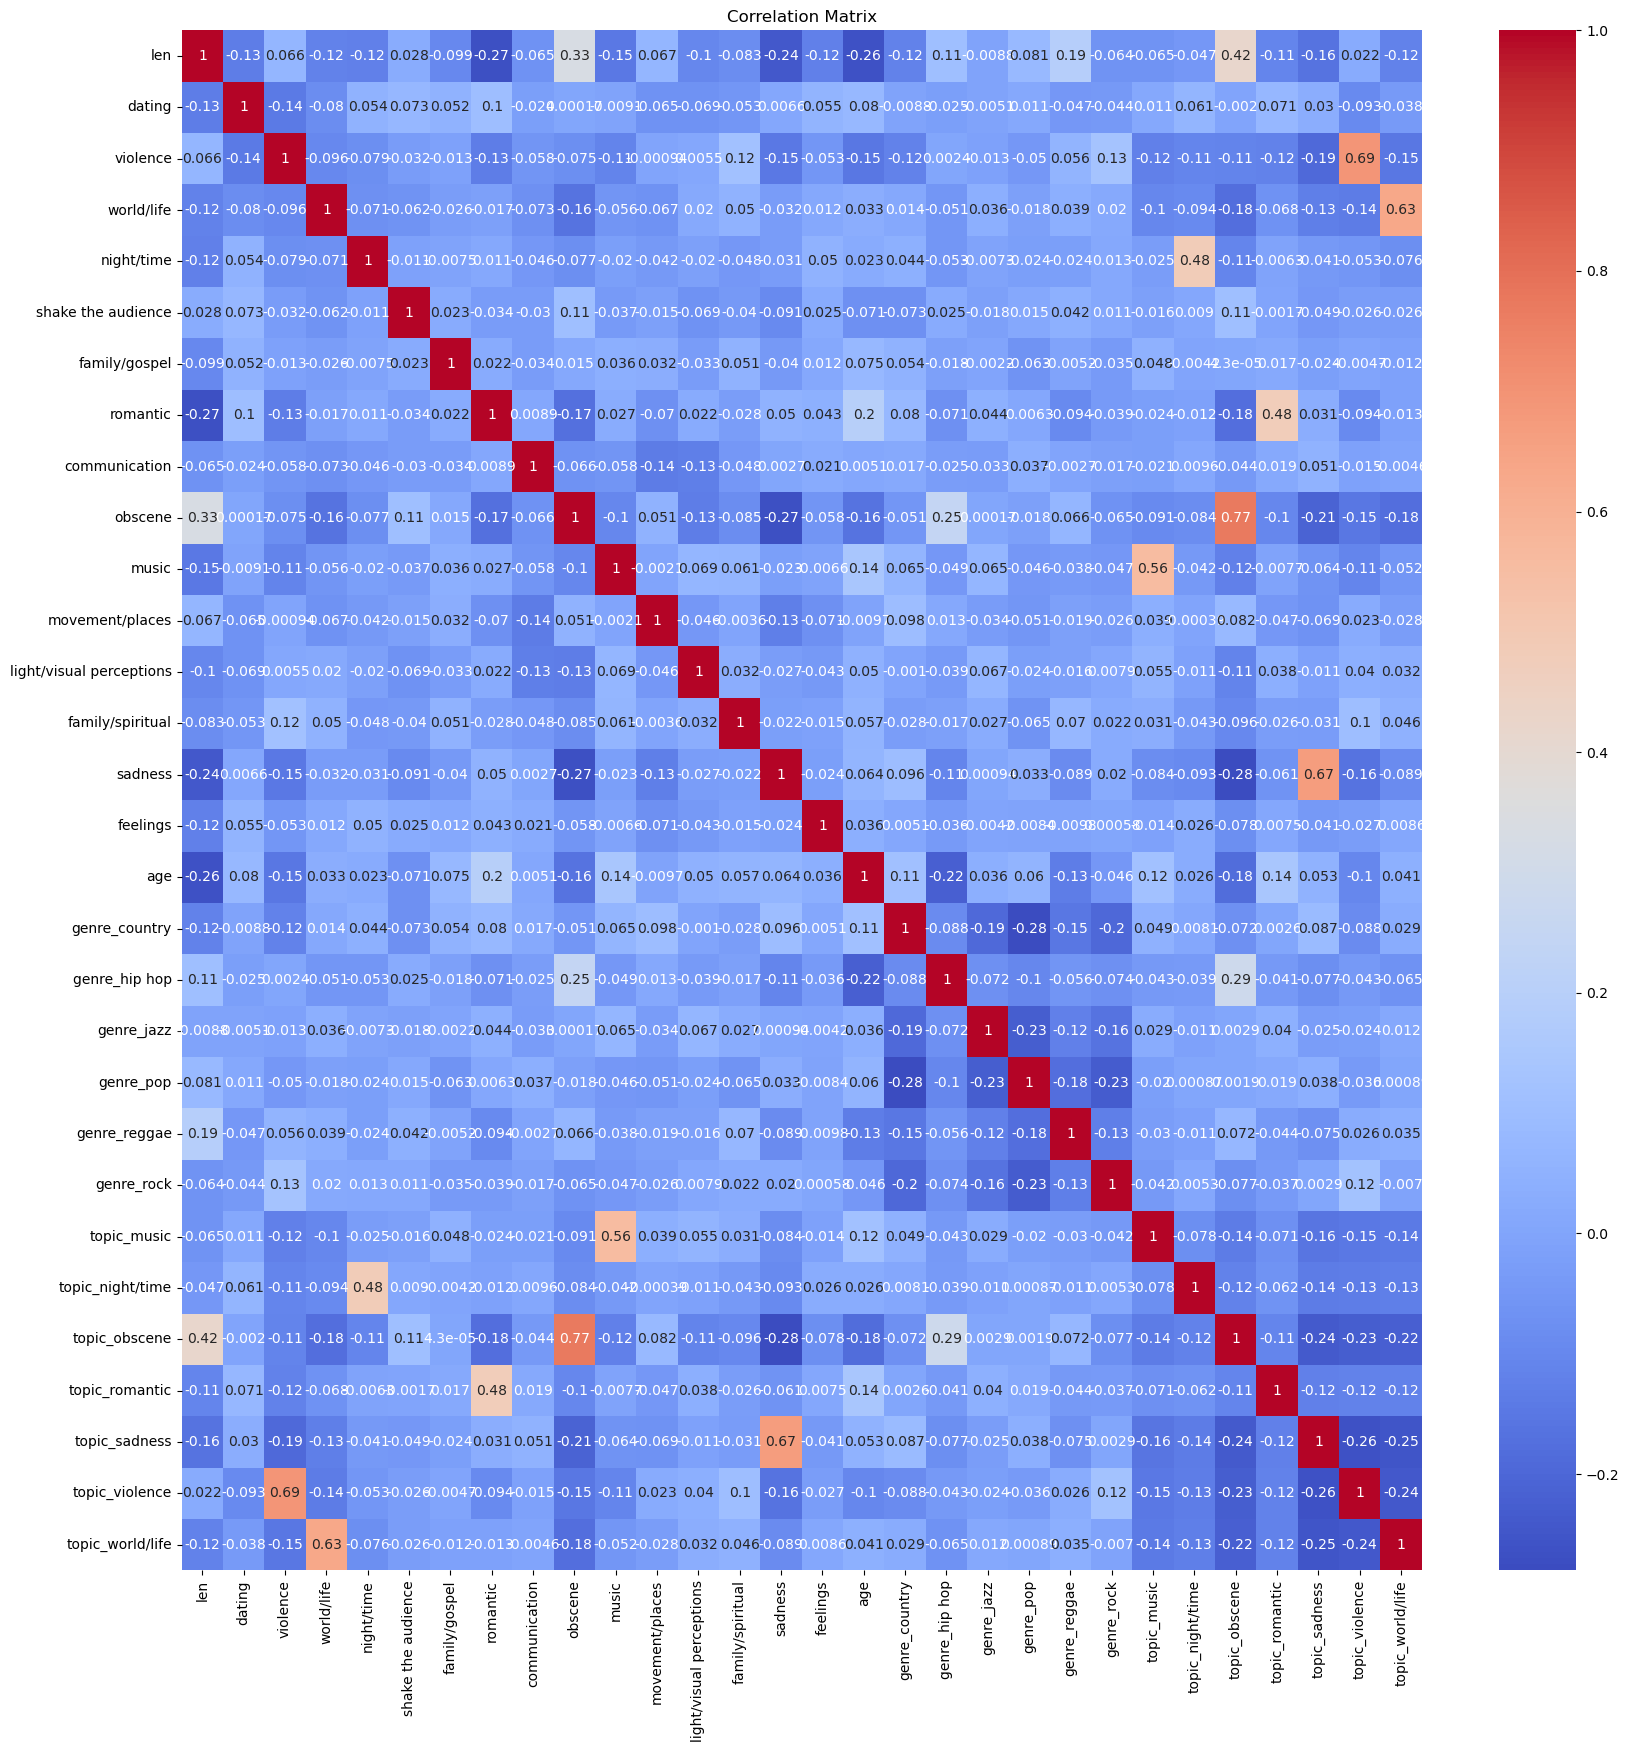

In [32]:
# Correlation matrix
correlation_matrix = df_encoded.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As I suspected the topic columns have strong positive correlations with their respective topics. I'll drop all dummy variables related to topic.

In [33]:
df_final = df_encoded.drop(['topic_music', 'topic_night/time', 'topic_obscene', 'topic_romantic', 'topic_sadness', 'topic_violence', 'topic_world/life'], axis=1)

In [34]:
df_final

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,...,family/spiritual,sadness,feelings,age,genre_country,genre_hip hop,genre_jazz,genre_pop,genre_reggae,genre_rock
0,0.525197,-0.913672,0.655609,-1.219950,-1.048755,-0.990800,1.679368,0.548641,1.346268,-0.971263,...,-0.996862,1.237622,1.673739,2.176685,0,0,0,1,0,0
1,-0.526657,1.401776,0.815335,1.326818,-0.710221,-0.536293,1.326662,-0.645544,-0.850660,-0.662785,...,1.376968,-0.914008,-0.634402,2.176685,0,0,0,1,0,0
2,-1.172114,-0.044714,-0.544165,-0.629212,-0.369307,-0.078592,-0.028291,1.575540,1.325279,-0.352138,...,-0.178829,-0.623228,2.008309,2.176685,0,0,0,1,0,0
3,-0.454940,1.575126,-0.766795,-0.853469,-0.627240,1.140855,-0.374533,2.015353,-0.773426,-0.587171,...,-0.489372,1.040685,-0.538673,2.176685,0,0,0,1,0,0
4,-0.598375,-0.452364,-0.819285,1.303844,-0.688054,-0.506533,-0.456168,2.070119,-0.830028,-0.642586,...,1.088116,0.591230,-0.608829,2.176685,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,0.118799,-0.452364,-0.819285,-0.906343,-0.688054,-0.506533,-0.456168,-0.622481,-0.830028,1.647733,...,-0.562589,0.573594,-0.608829,-1.555734,0,1,0,0,0,0
28358,-0.144165,-0.480714,-0.838418,0.351981,-0.710221,-0.536293,-0.485924,1.173597,1.240065,1.564748,...,-0.589278,-0.914008,-0.634402,-1.555734,0,1,0,0,0,0
28359,0.094893,-0.391021,0.993810,0.955039,-0.640089,1.506642,-0.391781,0.884087,-0.785385,1.609961,...,-0.504841,-0.854189,-0.553496,-1.555734,0,1,0,0,0,0
28360,-0.144165,-0.520745,-0.865435,-0.952830,-0.741522,1.623220,-0.527941,-0.678109,-0.879793,1.740220,...,-0.626963,-0.940706,-0.670511,-1.555734,0,1,0,0,0,0


<Axes: xlabel='len', ylabel='dating'>

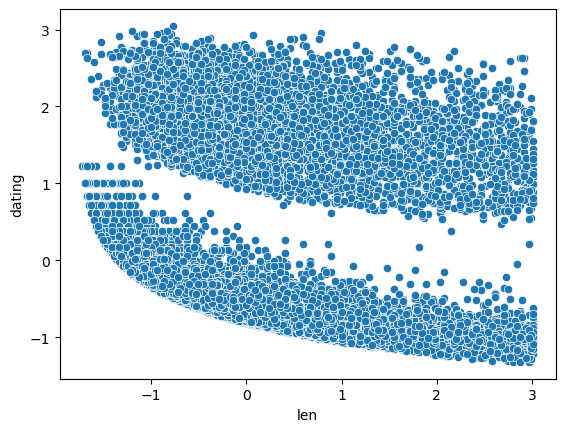

In [49]:
sns.scatterplot(data=df_final, x='len', y='dating')

In [35]:
# save data for later modeling
df_final.to_csv("../data/processed/recommendation_training_data_cleaned.csv", index=False)